# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

1. Load the ./data/ForeignGifts_edu.csv dataset.

In [5]:
import pandas as pd

# URL of the CSV file
url1 = 'https://raw.githubusercontent.com/ds4e/EDA/main/assignment/data/ForeignGifts_edu.csv'
# Reading the CSV file into a DataFrame
gifts = pd.read_csv(url1)
# Display the first few rows to verify the data
print(gifts.head())

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

2. For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.

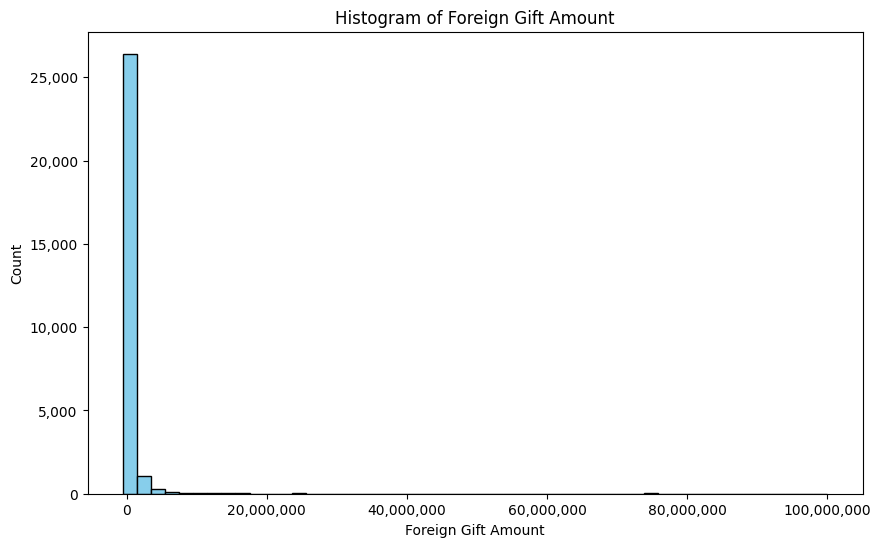

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Ensure numeric conversion with coercion for errors
gifts['Foreign Gift Amount'] = pd.to_numeric(gifts['Foreign Gift Amount'], errors='coerce')

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(gifts['Foreign Gift Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Count')

# Format x and y axes with comma separators
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show plot
plt.show()

# Print summary statistics
print(gifts['Foreign Gift Amount'].describe())


It appears that most of the gifts are under 20,000,000 with the mean being around 6,000,000 dollars. There are a few outliers (a few gifts that are unusually big).

3. For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [25]:
import pandas as pd

# Count occurrences of each Gift Type
gift_counts = gifts['Gift Type'].value_counts().reset_index()

# Rename columns for clarity
gift_counts.columns = ['Gift Type', 'Count']

# Display the value counts table
print(gift_counts)



       Gift Type  Count
0       Contract  17274
1  Monetary Gift  10936
2    Real Estate     11


In [26]:
import pandas as pd

# Given value counts
data = {'Gift Type': ['Contract', 'Monetary Gift', 'Real Estate'],
        'Count': [17274, 10936, 11]}

# Create DataFrame
gift_counts = pd.DataFrame(data)

# Calculate proportions
gift_counts['Proportion'] = gift_counts['Count'] / gift_counts['Count'].sum()

# Convert to percentage format
gift_counts['Proportion (%)'] = gift_counts['Proportion'] * 100

# Display results
print(gift_counts[['Gift Type', 'Count', 'Proportion (%)']])


       Gift Type  Count  Proportion (%)
0       Contract  17274       61.209737
1  Monetary Gift  10936       38.751285
2    Real Estate     11        0.038978


4. Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


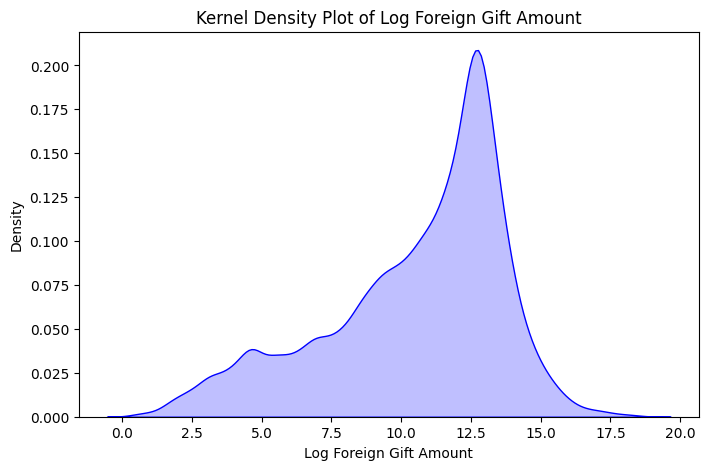

<ipython-input-9-bababdd27682>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gift Type')


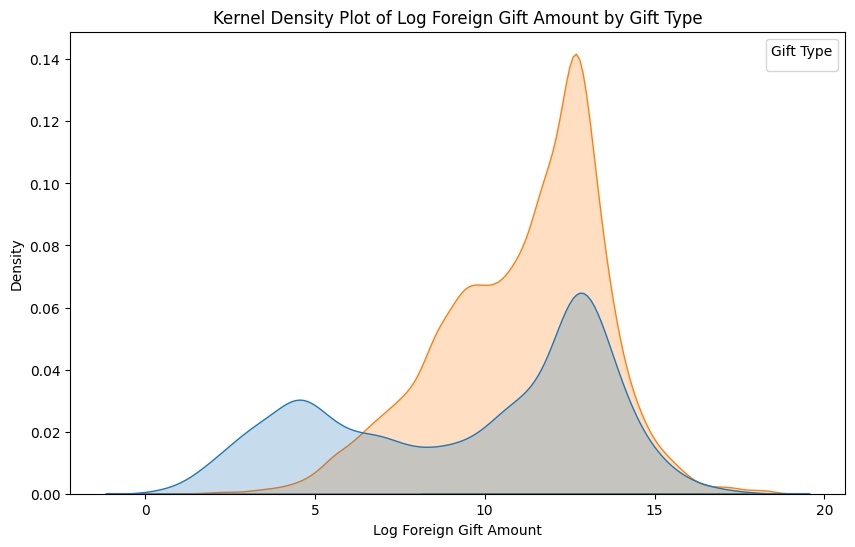

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your_file.csv' with actual file path if needed)
# gifts = pd.read_csv('your_file.csv')

# Convert 'Foreign Gift Amount' to numeric and apply log transformation
gifts['Log Foreign Gift Amount'] = np.log1p(pd.to_numeric(gifts['Foreign Gift Amount'], errors='coerce'))

# Plot KDE for overall log-transformed Foreign Gift Amount
plt.figure(figsize=(8, 5))
sns.kdeplot(gifts['Log Foreign Gift Amount'].dropna(), fill=True, color='blue')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

# Plot KDE conditional on Gift Type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gifts, x='Log Foreign Gift Amount', hue='Gift Type', fill=True)
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.legend(title='Gift Type')
plt.show()


This kernal density plot shows that a high amount of foreign gifts have a range between 7.5-17.5 million. This is the sweet spot where most of the donors tend to spend. With that said, there are a few higher donations which are skewing the chart and impacting the mean donation size.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [11]:
# Top 15 countries by number of gifts
top_countries_count = gifts['Country of Giftor'].value_counts().head(15)

# Top 15 countries by total amount given
top_countries_amount = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)

# Display results
print("Top 15 Countries by Number of Gifts:\n", top_countries_count)
print("\nTop 15 Countries by Total Amount Given:\n", top_countries_amount)


Top 15 Countries by Number of Gifts:
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 Countries by Total Amount Given:
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALI

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

Top 15 Institutions by Total Amount Received:
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: in

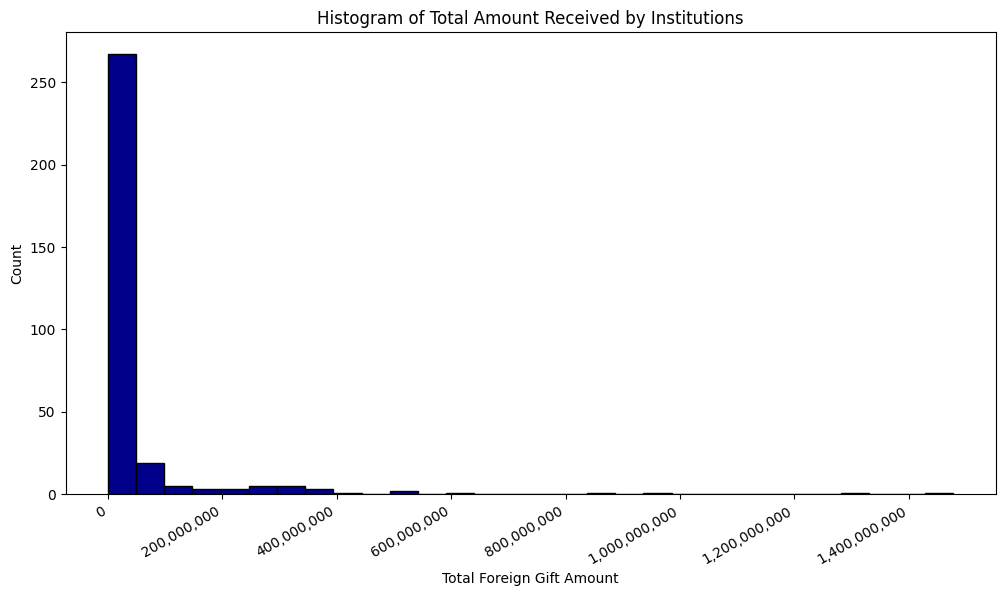

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Top 15 institutions by total amount received
top_institutions = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)

# Display results
print("Top 15 Institutions by Total Amount Received:\n", top_institutions)

# Create histogram
plt.figure(figsize=(12, 6))  # Increased width for better spacing
plt.hist(gifts.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=30, color='darkblue', edgecolor='black')  # Reduced bins

# Formatting
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Count')

# Format x and y axes with comma separators
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust x-axis ticks for better spacing
plt.xticks(rotation=30, ha='right')  # Rotates x labels for clarity

# Show the plot
plt.show()



7. Which giftors provide the most money, in total?

In [15]:
# Top 15 giftors by total amount given
top_giftors = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)

# Display results
print("Top 15 Giftors by Total Amount Given:\n", top_giftors)



Top 15 Giftors by Total Amount Given:
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


It appears that most of the funding is coming from the Qatar Foundation.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.**

In [28]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ds4e/wrangling/main/assignment/data/airbnb_hw.csv'
'/content/EDA/assignment/data/airbnb_hw.csv'
airbnb = pd.read_csv(url)

**2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.**

In [ ]:
# Get the dimensions of the dataset
print("Dimensions of the dataset:", airbnb.shape)  # (rows, columns)

# Get the number of observations (rows)
print("Number of observations:", airbnb.shape[0])

# Get the number of variables (columns)
print("Number of variables:", airbnb.shape[1])

# Display column names (variables)
print("Variables included:", airbnb.columns.tolist())

# Show the first few rows
print(airbnb.head())

Dimensions of the dataset: (30478, 13)
Number of observations: 30478
Number of variables: 13
Variables included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room

**3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?**

In [ ]:
room_property_crosstab = pd.crosstab(airbnb['Property Type'], airbnb['Room Type'])

# Display the cross-tabulation
print(room_property_crosstab)

Room Type        Entire home/apt  Private room  Shared room
Property Type                                              
Apartment                  15669         10748          685
Bed & Breakfast               13           155           12
Boat                           7             1            0
Bungalow                       4             0            0
Cabin                          1             1            0
Camper/RV                      6             1            0
Castle                         0             1            0
Chalet                         0             1            0
Condominium                   72            22            0
Dorm                           4            16           11
House                        752          1258           80
Hut                            0             2            0
Lighthouse                     1             0            0
Loft                         392           312           49
Other                         14        

Based on the data above, it seems that most of the rentals listed in New York are apartments. Most of the properties listed are for the entire home. However, for houses, bed & breakfasts, and dorms, it is more popular to have a private room rather than the entire property. This makes sense given the extremely high rental prices in New York City.

**4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.**

Yes the data seems to be badly scaled with many outliers. Most of the apartments seem to be priced at the $100-$200 a night range, with some extremely luxurious listings being the outliers.  

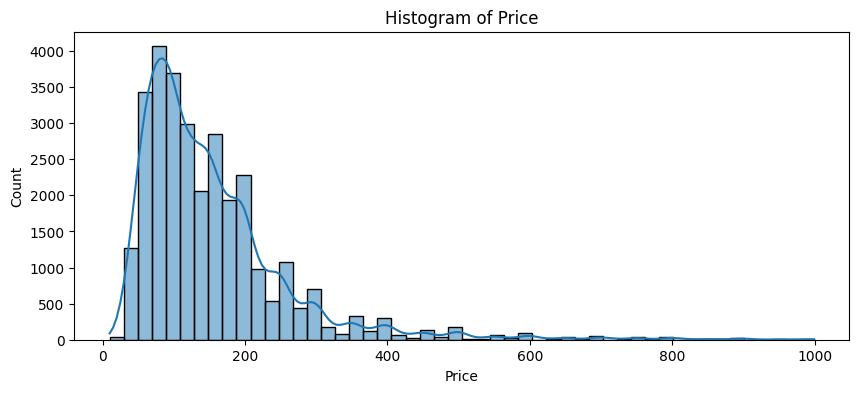

<ipython-input-29-bf20124e242c>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb['Price'], shade=True)


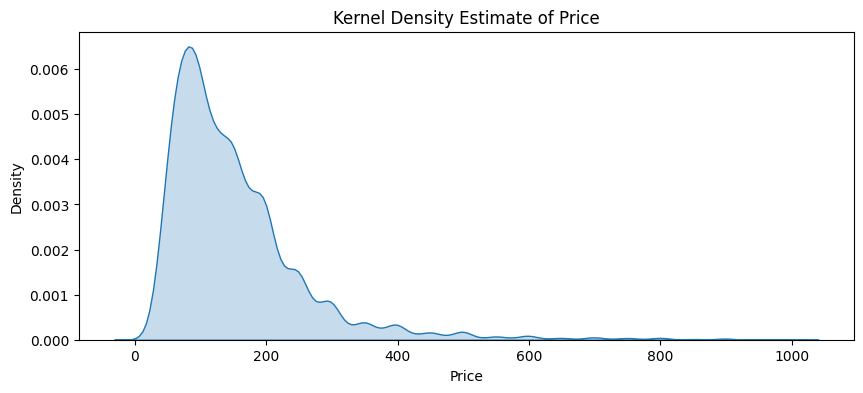

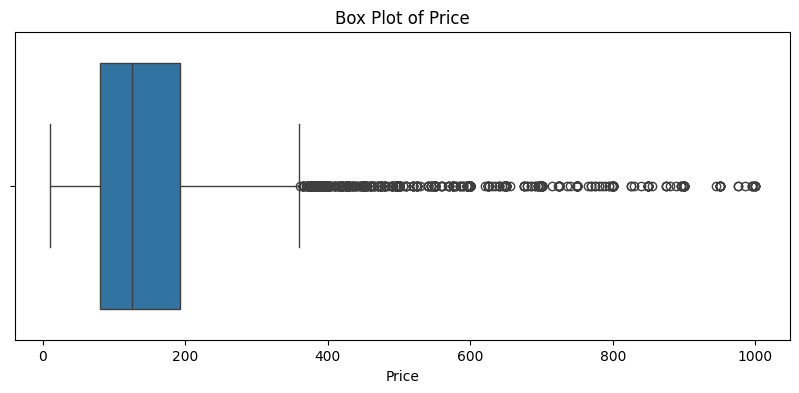

Statistical Summary of Price:
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


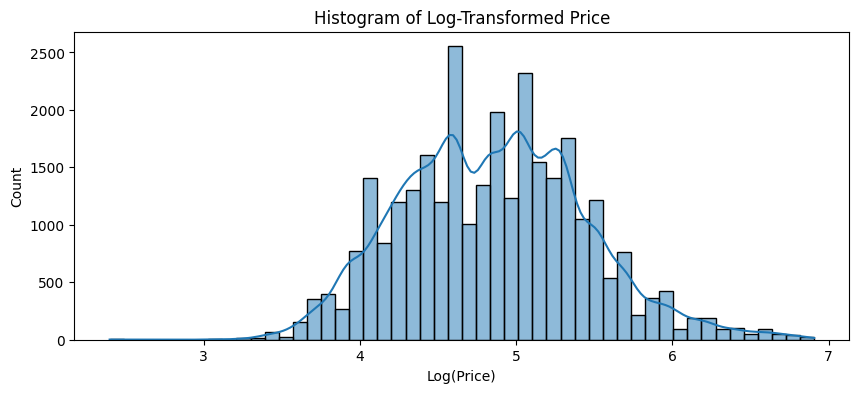

<ipython-input-29-bf20124e242c>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb['price_log'], shade=True)


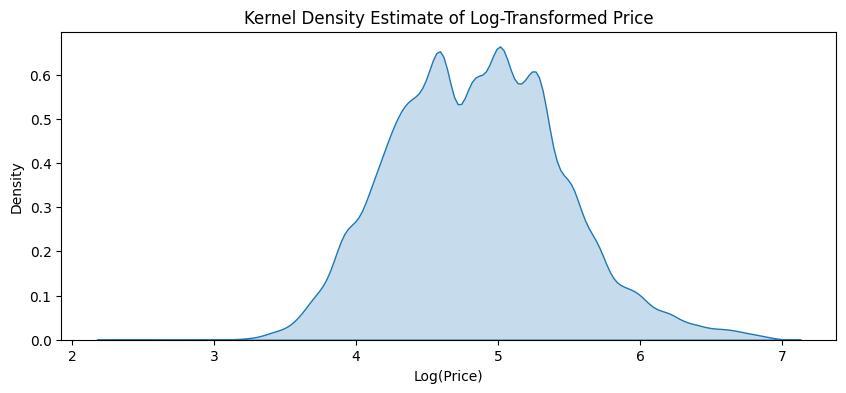

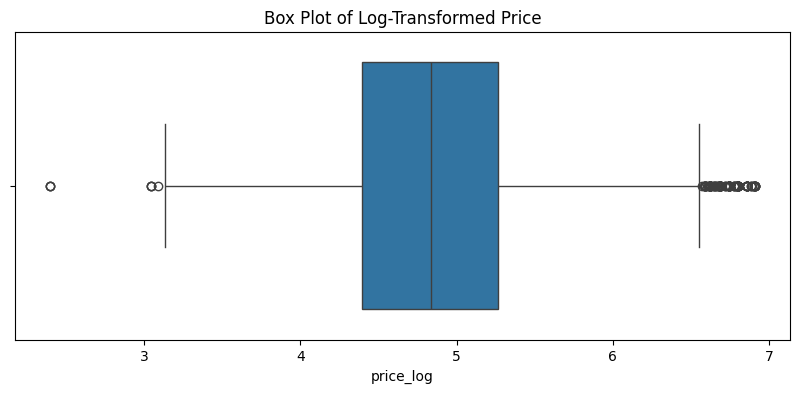

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Price' to numeric (in case of formatting issues like '$' signs)
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Drop missing values in Price
airbnb = airbnb.dropna(subset=['Price'])

# Step 1: Plot Histogram
plt.figure(figsize=(10, 4))
sns.histplot(airbnb['Price'], bins=50, kde=True)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.show()

# Step 2: Kernel Density Plot
plt.figure(figsize=(10, 4))
sns.kdeplot(airbnb['Price'], shade=True)
plt.title("Kernel Density Estimate of Price")
plt.xlabel("Price")
plt.show()

# Step 3: Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=airbnb['Price'])
plt.title("Box Plot of Price")
plt.show()

# Step 4: Statistical Summary
print("Statistical Summary of Price:\n", airbnb['Price'].describe())

# Step 5: Log Transformation (handle zeros before log)
airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors

# Repeat the steps with price_log
plt.figure(figsize=(10, 4))
sns.histplot(airbnb['price_log'], bins=50, kde=True)
plt.title("Histogram of Log-Transformed Price")
plt.xlabel("Log(Price)")
plt.show()

plt.figure(figsize=(10, 4))
sns.kdeplot(airbnb['price_log'], shade=True)
plt.title("Kernel Density Estimate of Log-Transformed Price")
plt.xlabel("Log(Price)")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=airbnb['price_log'])
plt.title("Box Plot of Log-Transformed Price")
plt.show()

Yes, it appears that the data is badly scaled. The data is skewed to the right with most of the rentals being between $150-200 a night. There are a few outliers (more expensive properties) that are skewing the distribution. After using the log function, it seems that the box plot is more normalised.

**5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.**

<ipython-input-8-cf16880d9918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors


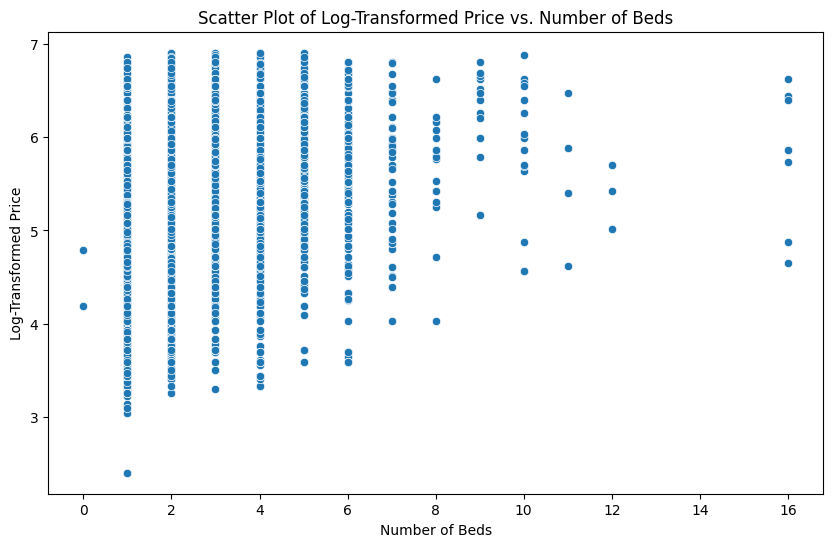

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [ ]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Drop missing values in Price and Beds
airbnb = airbnb.dropna(subset=['Price', 'Beds'])

# Step 1: Log transformation of Price
airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors

# Step 2: Scatter plot of price_log vs. Beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb['Beds'], y=airbnb['price_log'])
plt.title("Scatter Plot of Log-Transformed Price vs. Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.show()

# Step 3: Group by Beds and compute description of Price
price_by_beds = airbnb.groupby('Beds')['Price'].describe()

# Display the summary statistics
print(price_by_beds)

Based on the data above, it seems that the price of the rental increases as the number of beds increase. As the number of beds increase, the standard deviation of the prices also tend to increase as there seems to be more varaiablity with more expensive/luxury rentals.

**6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?**

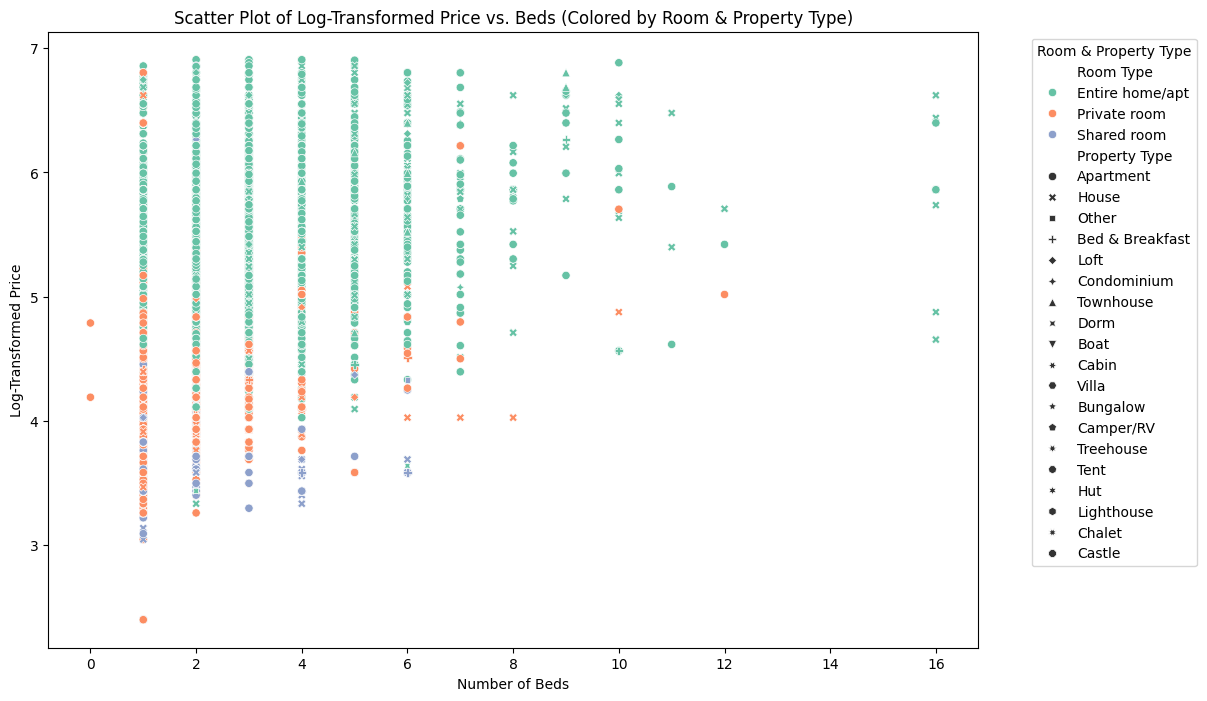

          Room Type    Property Type        mean  median         std  count
0   Entire home/apt        Apartment  200.188970   175.0  109.913339  15521
1   Entire home/apt  Bed & Breakfast  184.538462   130.0  119.814172     13
2   Entire home/apt             Boat  158.428571   150.0   51.110524      7
3   Entire home/apt         Bungalow  150.750000   160.5   46.464144      4
4   Entire home/apt            Cabin  250.000000   250.0         NaN      1
5   Entire home/apt        Camper/RV  114.333333    74.0  107.685963      6
6   Entire home/apt      Condominium  281.126761   200.0  175.313998     71
7   Entire home/apt             Dorm   44.250000    33.5   24.060687      4
8   Entire home/apt            House  234.709141   188.5  159.842688    722
9   Entire home/apt       Lighthouse   39.000000    39.0         NaN      1
10  Entire home/apt             Loft  284.910290   220.0  184.515517    379
11  Entire home/apt            Other  290.800000   177.5  273.526273     10
12  Entire h

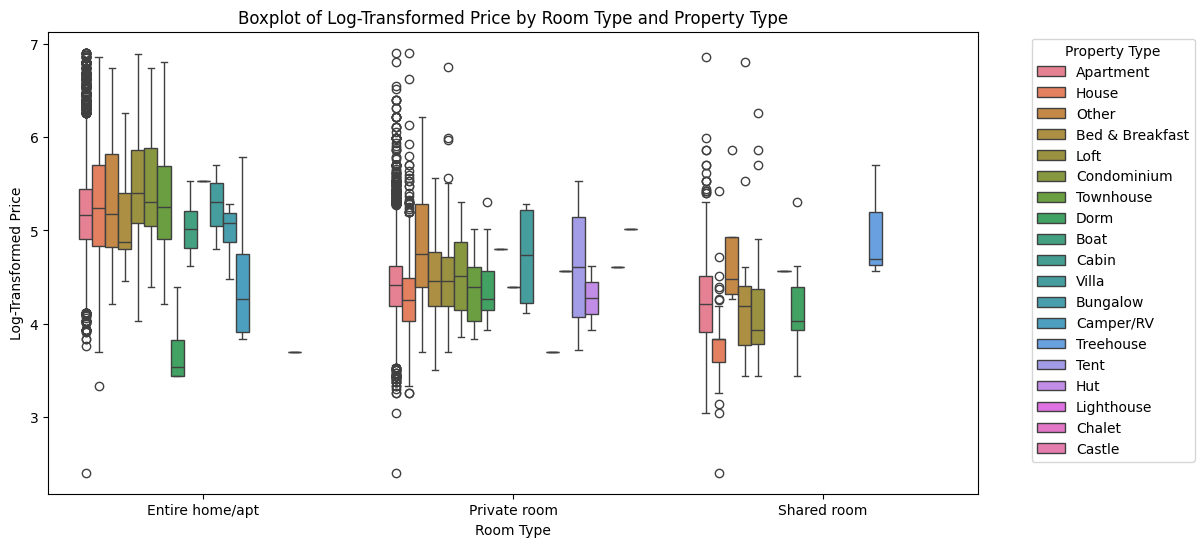

In [ ]:
#Scatter plot colored by Room Type and Property Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room Type', style='Property Type', palette='Set2')
plt.title('Scatter Plot of Log-Transformed Price vs. Beds (Colored by Room & Property Type)')
plt.xlabel('Number of Beds')
plt.ylabel('Log-Transformed Price')
plt.legend(title='Room & Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Descriptive statistics for Price by Room Type and Property Type
price_stats = airbnb.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'median', 'std', 'count']).reset_index()

#Display the descriptive statistics
print(price_stats)

#Identifying the highest average price
highest_avg_price = price_stats.loc[price_stats['mean'].idxmax()]
print("Room Type & Property Type with the Highest Average Price:")
print(highest_avg_price)

#Identifying the highest standard deviation
highest_std_dev = price_stats.loc[price_stats['std'].idxmax()]
print("Room Type & Property Type with the Highest Price Variability (Standard Deviation):")
print(highest_std_dev)

#Boxplot to evaluate mean vs. median reliability
plt.figure(figsize=(12, 6))
sns.boxplot(data=airbnb, x='Room Type', y='price_log', hue='Property Type')
plt.title('Boxplot of Log-Transformed Price by Room Type and Property Type')
plt.xlabel('Room Type')
plt.ylabel('Log-Transformed Price')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



According to the scatterplot above, as the number of bedrooms increase, the base log transformed price also increases. This makes sense as listings with more bedrooms are generally more expensive and start at a higher rate. The property type "Cabin" has the highest median price. The "Other" property type has the highest standard deviation which makes sense since it is a bucket of property types that don't fit into a standard bucket. I beleive "median" is a more accurate measure as the mean can easily be skewed by a couple very expensive or very cheap listings.

  **7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?**

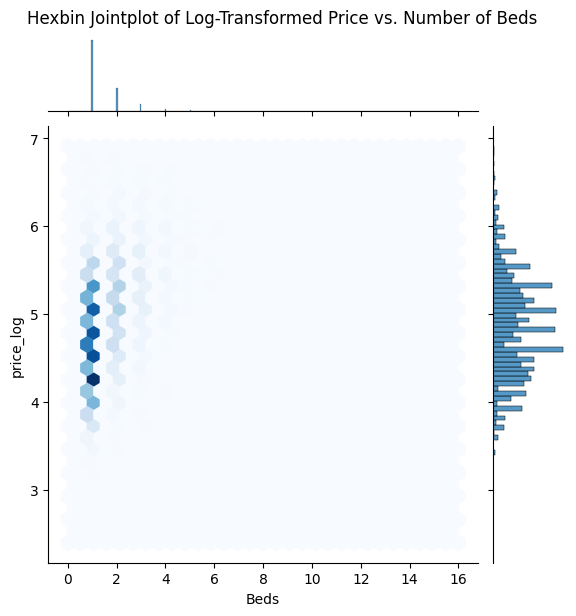

In [ ]:
#Step 9: Jointplot with hex bins to visualize data distribution
sns.jointplot(data=airbnb, x='Beds', y='price_log', kind='hex', gridsize=30, cmap='Blues')
plt.suptitle('Hexbin Jointplot of Log-Transformed Price vs. Number of Beds', y=1.02)
plt.show()

The data primarily falls within a log price range of 4 to 5.5, with most properties having two or fewer bedrooms. This makes sense in the context of New York City, where apartments with more bedrooms are considered "rare." This provides better insight into plots 5 and 6, which previously seemed more scattered. In those plots, the wide distribution of log prices from 3 to 8 made it harder to pinpoint where prices were most concentrated.